In [24]:
from os import listdir
from os.path import isfile, join

import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.style
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
mpl.style.use('default')

from sympy import *
from api.color_scheme import *

save_plot = False

random_state = 0
random.seed(random_state)
np.random.seed(random_state)

In [25]:
res_files = [f for f in listdir('../results/') if isfile(join('../results/', f))]
random.shuffle(res_files)

In [26]:
lib = ['x', 'x^2', 'x^3', 'x^4', 'exp', 'log', 'sqrt', 'tanh', 'sin']
np_lib = ['exp', 'log', 'sqrt', 'tanh', 'sin']

v = symbols('v')

In [27]:
data = 'TRACE'  # 'linear', 'non-linear', 'TRACE', 'colon', 'rdata', 'FRTCS'

In [28]:
# df_summary = {}
# 
# df_temp = pd.read_csv('../results/pred_coxkan_{}_{}.csv'.format(data, 0), index_col=[0])
# 
# col_clean = []  # used to enable single variable in function
# for i in range(df_temp.shape[1] - 1, 0, -1):
#     col_clean.append('x_{}'.format(i))
# 
# col = []  # initialize feature names
# for i in range(1, df_temp.shape[1]):
#     col.append('x_{}'.format(i))
# col.append('pred')
# 
# for var in col[:-1]:  # enumerate all feature names
#     
#     # get min and max of inputs and outputs
#     x_lim_lower, x_lim_upper = 0, 0
#     y_lim_lower, y_lim_upper = 0, 0
#     
#     legend_flag = 0  # only legend one of the predicted results
#     
#     _, ax = plt.subplots(figsize=(2.5,2.5))
#     
#     for i in res_files:
#         
#         if i.split('_')[1] != 'symbol' or i.split('_')[2] != data:
#             continue  # get only text files with symbolic functions
#         
#         # get random seed from the file names
#         seed = i.split('_')[-1].split('.')[0]
#         # get the corresponding symbolic functions
#         res = pd.read_csv('../results/{}'.format(i), sep=":\t", header=None, engine='python')
#         
#         try:  # get the corresponding prediction results with the symbolic functions
#             df_pred = pd.read_csv('../results/pred_coxkan_{}_{}.csv'.format(data, seed), index_col=[0])
#         except FileNotFoundError:
#             continue  # avoid missing files
#         df_pred.columns = col
#             
#         # print("Symbolic activation function:", res.iloc[-2][0])
#         fun_str = res.iloc[-1][0]  # get symbolic functions with 10 digits reserved
#         for v in col_clean:
#             if v != var:  # set all other variables as 0
#                 fun_str = fun_str.replace(v, '0')
#             else:  # set target feature as variable v
#                 fun_str = fun_str.replace(v, 'v')
#         
#         print("Simplified Symbolic Function: {}".format(str(simplify(fun_str)).replace('v', var)))
#                 
#         for l in np_lib:  # replace functions in text with numpy functions
#             fun_str = fun_str.replace(l, 'np.{}'.format(l))
#         
#         # define the symbolic function using simplified strings
#         eval(compile('''def fun(v):
#             return {}
#         '''.format(fun_str), '<string>', 'exec'))
# 
#         x_lim_lower, x_lim_upper = (  # update min and max of features
#             min(df_pred['{}'.format(var)].min(), x_lim_lower), max(df_pred['{}'.format(var)].max(), x_lim_upper))
#         
#         # get the smooth symbolic function with grid values
#         xs = np.linspace(x_lim_lower, x_lim_upper, 1000)
#         fun_pred = [fun(x) for x in xs]
#         
#         # get label of symbolic functions
#         label = '$\hat\phi_{}$'.format(var.split('_')[-1]) if legend_flag == 0 and (data == 'linear' or data == 'non-linear') else None
#         # plot the symbolic functions
#         sns.lineplot(x=xs, y=fun_pred, linewidth=2, color=AAAI_pal['Main Blue'], alpha=(1 - random.random()) ** legend_flag, label=label)
#         
#         y_lim_lower, y_lim_upper = (  # update min and max of outputs
#             min(min(fun_pred), y_lim_lower), max(max(fun_pred), y_lim_upper))
#         
#         legend_flag = 1  # only plot the first appearance
#         
#         df_summary[seed] = df_pred  # store the prediction results
#     
#     if data == 'linear':
#         # get ground truth if with linear or non-linear experiments
#         if var == 'x_1':
#             df_pred['fun_true_{}'.format(var)] = df_pred[var]
#         else:
#             df_pred['fun_true_{}'.format(var)] = df_pred[var] * 2
#         
#         y_lim_lower, y_lim_upper = (
#             min(df_pred['fun_true_{}'.format(var)].min(), y_lim_lower), max(df_pred['fun_true_{}'.format(var)].max(), y_lim_upper))
#     
#         sns.lineplot(data=df_pred, x=var, y='fun_true_{}'.format(var), linewidth=2,
#                      label='$\phi_{}$'.format(var.split('_')[-1]), color=AAAI_pal['Yellow'])
#     
#     elif data == 'non-linear':
#         # get ground truth if with linear or non-linear experiments
#         df_pred['fun_true_{}'.format(var)] = np.log(5) * np.exp(-df_pred[var] ** 2 / (2 * 0.5 ** 2))
#         
#         y_lim_lower, y_lim_upper = (
#             min(df_pred['fun_true_{}'.format(var)].min(), y_lim_lower), max(df_pred['fun_true_{}'.format(var)].max(), y_lim_upper))
#     
#         sns.lineplot(data=df_pred, x=var, y='fun_true_{}'.format(var), linewidth=2,
#                      label='$\phi_{}$'.format(var.split('_')[-1]), color=AAAI_pal['Yellow'])
#     
#     plt.xlabel('$x_{{{}}}$'.format(var.split('_')[-1]))
#     plt.ylabel('Activation Function $(x_{{{}}})$'.format(var.split('_')[-1]))
#     if data == 'linear' or data == 'non-linear':
#         plt.legend()
#     
#     marg = min(y_lim_upper, 5) - max(y_lim_lower, -5)
#     plt.ylim([max(y_lim_lower, -5) - 0.1 * marg, min(y_lim_upper, 5) + 0.1 * marg])
#     # plt.ylim([-0.6, 1.3])
#     # plt.xlim([df_pred['{}'.format(var)].min(), df_pred['{}'.format(var)].max()])
#     
#     ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#     ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#     
#     if save_plot:
#         plt.savefig('../fig/func_{}_{}.png'.format(data, var), bbox_inches='tight', dpi=500, transparent=True)
#     
#     plt.show()

Simplified Symbolic Function: -0.2612045407*sin(1.0433599949*x_1 - 7.8063998222) - 1.39492341245738
Simplified Symbolic Function: 0.2495103925*sin(1.3802396059*x_1 + 6.8164801598) - 1.59062573607731
Simplified Symbolic Function: 1.317496419*sin(0.4138396084*x_1 - 7.3890399933) + 1.19958038184122
Simplified Symbolic Function: 0.1985500306*tanh(2.7280797958*x_1 + 0.2653597593) - 0.717908338520501
Simplified Symbolic Function: 0.060248021*tanh(3.4760000706*x_1 + 0.7543995976) - 0.698441545447859
Simplified Symbolic Function: -0.1281939149*sin(2.2552800179*x_1 + 3.9895997047) - 1.2925286135594


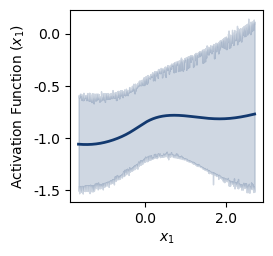

Simplified Symbolic Function: -0.4792002141*sin(0.5757598281*x_2 - 7.4087195396) - 1.56649164887851
Simplified Symbolic Function: -0.231765762*sin(1.5565598011*x_2 + 5.2038402557) - 1.66811732018343
Simplified Symbolic Function: 0.274576377513335 - 0.2944251895*sin(0.4095996022*x_2 + 8.39328002929688)
Simplified Symbolic Function: -0.1341159642*sin(1.5441598892*x_2 - 1.7780796289) - 0.797668981090776
Simplified Symbolic Function: -0.0454529561*sin(1.2193597555*x_2 - 2.1816000938) - 0.697251868900905
Simplified Symbolic Function: -1.4423366785*sin(0.3290396631*x_2 + 4.7921600342) - 2.63413785721012


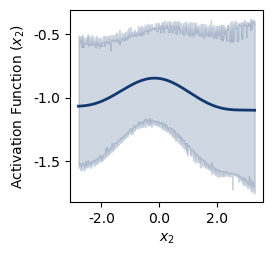

Simplified Symbolic Function: -0.6252025366*tanh(0.745599687099457*x_3 + 0.267919749) - 0.97040644026965
Simplified Symbolic Function: -0.5926459432*tanh(1.228479743*x_3 + 1.2522398233) - 0.960677905671331
Simplified Symbolic Function: 0.8277207017*sin(0.364479661*x_3 - 4.2300801277) - 0.711360410934483
Simplified Symbolic Function: -0.2882111371*tanh(0.7410396338*x_3 + 0.5371998549) - 0.524951067613515
Simplified Symbolic Function: 0.7599785924*sin(0.392159611*x_3 - 3.8039999008) - 1.12741697143988
Simplified Symbolic Function: -0.4369376898*tanh(0.951680064201355*x_3 + 0.9229601026) - 0.878605354415562


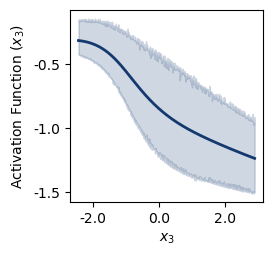

Simplified Symbolic Function: 0.1014072746*tanh(1.9879999161*x_4 - 1.155679822) - 1.05089836702937
Simplified Symbolic Function: -0.8056984544*sin(1.1532799006*x_4 - 2.577039957) - 1.89486055555858
Simplified Symbolic Function: 0.7648185492*sin(0.413279593*x_4 + 5.2076001167) + 0.694878861937497
Simplified Symbolic Function: 0.1957461536*sin(1.1224799156*x_4 + 7.4180002213) - 0.843859234097899
Simplified Symbolic Function: 0.1440771222*tanh(0.5182397962*x_4 - 0.4879197478) - 0.594813294043752
Simplified Symbolic Function: 0.4280100763*sin(0.533439815*x_4 + 5.8160800934) - 1.00365341156752


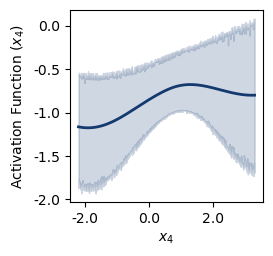

Simplified Symbolic Function: 0.6177554727*tanh(0.8907998204*x_5 - 1.2355997562) - 0.612507837056558
Simplified Symbolic Function: -0.171806097*sin(1.8000001907*x_5 - 9.9999399185) - 1.3703238036019
Simplified Symbolic Function: 0.0846670717000961*sin(0.4487995803*x_5 - 4.1593599319) - 0.0501071816803744
Simplified Symbolic Function: 0.012256825*(x_5 + 0.7)**2 - 0.672429797435619
Simplified Symbolic Function: -0.2655478418*sin(0.6826400161*x_5 + 8.4284000397) - 0.437087726948258
Simplified Symbolic Function: 0.1321166456*sin(1.0656799078*x_5 - 0.9987999797) - 1.08530126057664


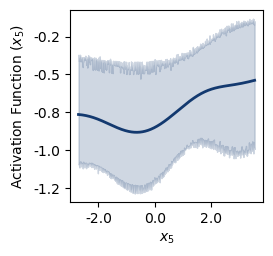

Simplified Symbolic Function: 0.4821707606*tanh(1.1134399176*x_6 - 2.29807996749878) - 0.661477233277897
Simplified Symbolic Function: 0.2158938731*(x_6 + 0.0512427224)**2 - 1.4643481836912
Simplified Symbolic Function: -0.1831140816*tanh(0.6451200247*x_6 - 1.1134399176) - 0.125517996240245
Simplified Symbolic Function: 0.6236742735*tanh(1.1297597885*x_6 - 2.4309601784) - 0.0523246191254302
Simplified Symbolic Function: 0.0513409339*sin(1.1255198717*x_6 - 2.1494400501) - 0.6170344900705
Simplified Symbolic Function: 0.5214375854*tanh(2.0091998577*x_6 - 4.0759997368) - 0.675250684967021


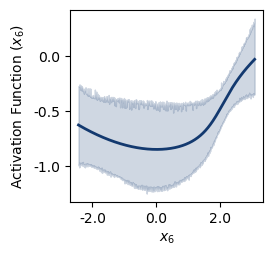

Simplified Symbolic Function: -0.2569631636*tanh(0.6829600334*x_7 + 0.119039885699749) - 1.10356930979586
Simplified Symbolic Function: -0.489349097*tanh(2.3031997681*x_7 + 1.9572800398) - 0.993574675555919
Simplified Symbolic Function: 1.0658391714*sin(0.3174396753*x_7 + 5.1240000725) + 0.998756745039423
Simplified Symbolic Function: 0.3051221073*sin(1.1031998396*x_7 - 8.3855199814) - 0.403400042213915
Simplified Symbolic Function: -0.0875345095992088*sin(1.162399888*x_7 + 1.180639863) - 0.57906113152922
Simplified Symbolic Function: -0.3459719121*tanh(1.9124001265*x_7 + 1.8110396862) - 0.868428131010444


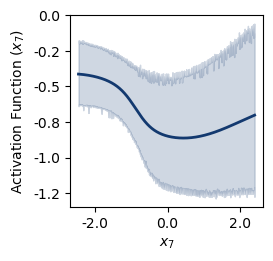

Simplified Symbolic Function: -0.1791949123*sin(0.9532000422*x_8 - 1.7793596983) - 1.30932615158254
Simplified Symbolic Function: 0.372948050498962*tanh(1.0158399343*x_8 + 0.2164798081) - 1.54327902336629
Simplified Symbolic Function: 0.8074022532*tanh(0.5067195296*x_8 - 1.0280799866) + 0.646171864805885
Simplified Symbolic Function: 0.260669589*sin(1.0060800314*x_8 + 1.7771997452) - 0.921560655652148
Simplified Symbolic Function: -0.7582666278*sin(0.276079744100571*x_8 + 8.5380001068) - 0.0723306752838746
Simplified Symbolic Function: 0.2077743709*sin(0.7449596524*x_8 + 6.82927989959717) - 1.30429625162518


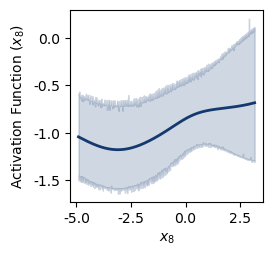

Simplified Symbolic Function: -0.1492668986*sin(0.9324800968*x_9 + 4.2156000137) - 1.2652376439722
Simplified Symbolic Function: -0.0015926507*(0.6507914521*x_9 + 1)**4 - 1.4621886352756
Simplified Symbolic Function: 0.0707196668*tanh(0.8139997721*x_9 - 1.3617596626) + 0.0839462374109416
Simplified Symbolic Function: 0.932210385799408*sin(0.3429596722*x_9 + 5.6760001183) - 0.134543823218573
Simplified Symbolic Function: -0.2033304125*sin(0.4748795629*x_9 - 9.7179203033) - 0.601262634241269
Simplified Symbolic Function: 0.1207346469*tanh(0.9840800166*x_9 + 0.251839757) - 1.22616671578423


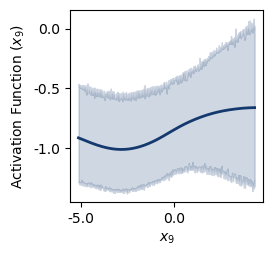

Simplified Symbolic Function: 0.0367463908*exp(3.3768000603*x_10) - 1.1707608940775
Simplified Symbolic Function: 0.0005524207*exp(7.3990397453*x_10) - 1.4643337066756
Simplified Symbolic Function: 0.000265022*exp(5.8559999466*x_10) + 0.0216741715116493
Simplified Symbolic Function: 0.0455482247143811 - 0.7119721779*exp(-6.8159999847*x_10)
Simplified Symbolic Function: 0.0010398089*exp(6.4052000046*x_10) - 0.66105719336319
Simplified Symbolic Function: -0.272322476069988 - 0.9240653674*exp(-9.7880001068*x_10)


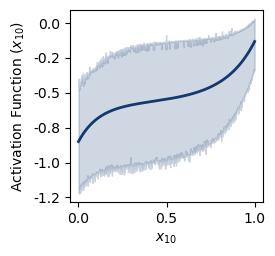

Simplified Symbolic Function: 6.71364e-5*exp(9.0012798309*x_11) - 1.1340816396775
Simplified Symbolic Function: 5.35332e-5*exp(9.0818395615*x_11) - 1.4638348191756
Simplified Symbolic Function: 3.3586e-6*exp(9.4647197723*x_11) + 0.0219358349116492
Simplified Symbolic Function: 0.0581489514*(x_11 + 0.6246262103)**4 - 0.675275572002194
Simplified Symbolic Function: 0.0086215339*exp(4.4314398766*x_11) - 0.66863891836319
Simplified Symbolic Function: 0.1101066604*(x_11 + 0.6579100615)**4 - 1.21701691601378


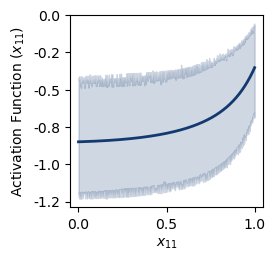

Simplified Symbolic Function: 0.2621132266*exp(1.30399966239929*x_12) - 1.3961277298775
Simplified Symbolic Function: 0.5863203736*(x_12 + 0.228772599)**4 - 1.46538730619886
Simplified Symbolic Function: 5.04329e-5*exp(9.4565601349*x_12) + 0.0218887606116498
Simplified Symbolic Function: 0.0001628246*exp(9.1179199219*x_12) - 0.666586777785619
Simplified Symbolic Function: 0.0500944185*exp(2.5903999805*x_12) - 0.71011180296319
Simplified Symbolic Function: 0.0229280236*exp(3.1999998093*x_12) - 1.21931586706999


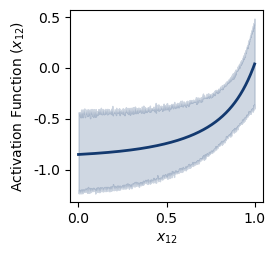

Simplified Symbolic Function: -0.0007295461*exp(4.94399976730347*x_13) - 1.1332849571775
Simplified Symbolic Function: -0.0001944435*exp(7.8480801582*x_13) - 1.4635868424756
Simplified Symbolic Function: 0.0219890908116493 - 4.98973e-5*exp(6.125679493*x_13)
Simplified Symbolic Function: -0.000640621*exp(6.2091197968*x_13) - 0.665783332185619
Simplified Symbolic Function: 0.000442539*exp(5.3559999466*x_13) - 0.66045992346319
Simplified Symbolic Function: -0.0002447197*exp(7.4521598816*x_13) - 1.19614312376999


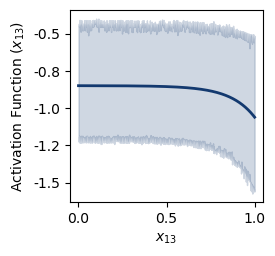

In [29]:
df_summary = {}

df_temp = pd.read_csv('../results/pred_coxkan_{}_{}.csv'.format(data, 0), index_col=[0])

col_clean = []  # used to enable single variable in function
for i in range(df_temp.shape[1] - 1, 0, -1):
    col_clean.append('x_{}'.format(i))

col = []  # initialize feature names
for i in range(1, df_temp.shape[1]):
    col.append('x_{}'.format(i))
col.append('pred')

for var in col[:-1]:  # enumerate all feature names
    
    # get min and max of inputs and outputs
    x_lim_lower, x_lim_upper = 0, 0
    y_lim_lower, y_lim_upper = 0, 0
    
    legend_flag = 0  # only legend one of the predicted results
    
    _, ax = plt.subplots(figsize=(2.5,2.5))
    
    df_lines = pd.DataFrame()
    
    for i in res_files:
        
        if i.split('_')[1] != 'symbol' or i.split('_')[2] != data:
            continue  # get only text files with symbolic functions
        
        # get random seed from the file names
        seed = i.split('_')[-1].split('.')[0]
        # get the corresponding symbolic functions
        res = pd.read_csv('../results/{}'.format(i), sep=":\t", header=None, engine='python')
        
        try:  # get the corresponding prediction results with the symbolic functions
            df_pred = pd.read_csv('../results/pred_coxkan_{}_{}.csv'.format(data, seed), index_col=[0])
        except FileNotFoundError:
            continue  # avoid missing files
        df_pred.columns = col
            
        # print("Symbolic activation function:", res.iloc[-2][0])
        fun_str = res.iloc[-1][0]  # get symbolic functions with 10 digits reserved
        for v in col_clean:
            if v != var:  # set all other variables as 0
                fun_str = fun_str.replace(v, '0')
            else:  # set target feature as variable v
                fun_str = fun_str.replace(v, 'v')
        
        print("Simplified Symbolic Function: {}".format(str(simplify(fun_str)).replace('v', var)))
                
        for l in np_lib:  # replace functions in text with numpy functions
            fun_str = fun_str.replace(l, 'np.{}'.format(l))
        
        # define the symbolic function using simplified strings
        eval(compile('''def fun(v):
            return {}
        '''.format(fun_str), '<string>', 'exec'))
        
        if legend_flag == 0:
            x_lim_lower, x_lim_upper = (  # update min and max of features
                min(df_pred['{}'.format(var)].min(), x_lim_lower), max(df_pred['{}'.format(var)].max(), x_lim_upper))
        # x_lim_lower, x_lim_upper = -3, 3
        
        # get the smooth symbolic function with grid values
        xs = np.linspace(x_lim_lower, x_lim_upper, 1000)
        fun_pred = [fun(x) for x in xs]
        
        # get label of symbolic functions
        # label = '$\hat\phi_{}$'.format(var.split('_')[-1]) if legend_flag == 0 and (data == 'linear' or data == 'non-linear') else None
        # plot the symbolic functions
        # sns.lineplot(x=xs, y=fun_pred, linewidth=2, color=AAAI_pal['Main Blue'], alpha=(1 - random.random()) ** legend_flag, label=label)
        df_line = pd.DataFrame()
        df_line['x'] = xs
        df_line['y'] = fun_pred
        df_lines = pd.concat([df_lines, df_line])
        
        y_lim_lower, y_lim_upper = (  # update min and max of outputs
            min(min(fun_pred), y_lim_lower), max(max(fun_pred), y_lim_upper))
        
        legend_flag = 1  # only plot the first appearance
        
        df_summary[seed] = df_pred  # store the prediction results
    
    label = '$\hat\phi_{}$'.format(var.split('_')[-1]) if (data == 'linear' or data == 'non-linear') else None
    sns.lineplot(data=df_lines, x='x', y='y', linewidth=2, color=AAAI_pal['Main Blue'], label=label)
    
    if data == 'linear':
        # get ground truth if with linear or non-linear experiments
        if var == 'x_1':
            df_pred['fun_true_{}'.format(var)] = df_pred[var]
        else:
            df_pred['fun_true_{}'.format(var)] = df_pred[var] * 2
        
        y_lim_lower, y_lim_upper = (
            min(df_pred['fun_true_{}'.format(var)].min(), y_lim_lower), max(df_pred['fun_true_{}'.format(var)].max(), y_lim_upper))
    
        sns.lineplot(data=df_pred, x=var, y='fun_true_{}'.format(var), linewidth=2,
                     label='$\phi_{}$'.format(var.split('_')[-1]), color=AAAI_pal['Yellow'])
    
    elif data == 'non-linear':
        # get ground truth if with linear or non-linear experiments
        df_pred['fun_true_{}'.format(var)] = np.log(5) * np.exp(-df_pred[var] ** 2 / (2 * 0.5 ** 2))
        
        y_lim_lower, y_lim_upper = (
            min(df_pred['fun_true_{}'.format(var)].min(), y_lim_lower), max(df_pred['fun_true_{}'.format(var)].max(), y_lim_upper))
    
        sns.lineplot(data=df_pred, x=var, y='fun_true_{}'.format(var), linewidth=2,
                     label='$\phi_{}$'.format(var.split('_')[-1]), color=AAAI_pal['Yellow'])
    
    plt.xlabel('$x_{{{}}}$'.format(var.split('_')[-1]))
    plt.ylabel('Activation Function $(x_{{{}}})$'.format(var.split('_')[-1]))
    if data == 'linear' or data == 'non-linear':
        plt.legend()
    
    # marg = min(y_lim_upper, 5) - max(y_lim_lower, -5)
    # plt.ylim([max(y_lim_lower, -5) - 0.1 * marg, min(y_lim_upper, 5) + 0.1 * marg])
    # plt.ylim([-0.6, 1.3])
    # plt.xlim([df_pred['{}'.format(var)].min(), df_pred['{}'.format(var)].max()])
    
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    if save_plot:
        plt.savefig('../fig/func_{}_{}.png'.format(data, var), bbox_inches='tight', dpi=500, transparent=True)
    
    plt.show()

In [30]:
# data = 'TRACE'  # 'linear', 'non-linear', 'TRACE', 'colon', 'rdata', 'FRTCS'
    
for i in res_files:
    
    if i.split('_')[1] != 'symbol' or i.split('_')[2] != data:
        continue  # get only text files with symbolic functions
    
    # get random seed from the file names
    seed = i.split('_')[-1].split('.')[0]
    # get the corresponding symbolic functions
    res = pd.read_csv('../results/{}'.format(i), sep=":\t", header=None, engine='python')
    
    try:  # get the corresponding prediction results with the symbolic functions
        df_pred = pd.read_csv('../results/pred_coxkan_{}_{}.csv'.format(data, seed), index_col=[0])
    except FileNotFoundError:
        continue  # avoid missing files
    df_pred.columns = col
    
    # fun_str = res.iloc[-3][0]
    fun_str = res.iloc[-3][0].replace('**', '^').replace('*', '')
    for l in np_lib:  # replace functions in text with numpy functions
        fun_str = fun_str.replace(l, '\\text{{{}}}'.format(l))
    print('$' + fun_str + '$ \\\\')

ValueError: Length mismatch: Expected axis has 7 elements, new values have 14 elements

In [ ]:
for data in ['TRACE', 'colon', 'rdata', 'FRTCS']:
    
    for i in res_files:
        
        if i.split('_')[1] != 'symbol' or i.split('_')[2] != data or i.split('_')[-1] != '3.txt':
            continue  # get only text files with symbolic functions
        
        # get the corresponding symbolic functions
        res = pd.read_csv('../results/{}'.format(i), sep=":\t", header=None, engine='python')
        
        # fun_str = res.iloc[-3][0]
        fun_str = res.iloc[-3][0].replace('**', '^').replace('*', '')
        for l in np_lib:  # replace functions in text with numpy functions
            fun_str = fun_str.replace(l, '\\text{{{}}}'.format(l))
        print('$' + fun_str + '$ \\\\')